In [1]:
from sentence_transformers import SentenceTransformer
from sentence_transformers import util

In [2]:
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

In [3]:
sentences = ["The weather today is beautiful", "It's raining!", "Dogs are awesome"]
embeddings = model.encode(sentences)
embeddings.shape

(3, 384)

In [4]:
first_embedding = model.encode("Today is a sunny day")
for embedding, sentence in zip(embeddings, sentences):
    similarity = util.pytorch_cos_sim(first_embedding, embedding)
    print(similarity, sentence)

tensor([[0.7344]]) The weather today is beautiful
tensor([[0.4180]]) It's raining!
tensor([[0.1060]]) Dogs are awesome


In [5]:
type(similarity),type(similarity[0]),similarity.shape

(torch.Tensor, torch.Tensor, torch.Size([1, 1]))

In [6]:
# Data from https://faq.ssa.gov/en-US/topic/?id=CAT-01092

faq = {
    "How do I get a replacement Medicare card?": "If your Medicare card was lost, stolen, or destroyed, you can request a replacement online at Medicare.gov.",
    "How do I sign up for Medicare?": "If you already get Social Security benefits, you do not need to sign up for Medicare. We will automatically enroll you in Original Medicare (Part A and Part B) when you become eligible. We will mail you the information a few months before you become eligible.",
    "What are Medicare late enrollment penalties?": "In most cases, if you don’t sign up for Medicare when you’re first eligible, you may have to pay a higher monthly premium. Find more information at https://faq.ssa.gov/en-us/Topic/article/KA-02995",
    "Will my Medicare premiums be higher because of my higher income?": "Some people with higher income may pay a larger percentage of their monthly Medicare Part B and prescription drug costs based on their income. We call the additional amount the income-related monthly adjustment amount.",
    "What is Medicare and who can get it?": "Medicare is a health insurance program for people age 65 or older. Some younger people are eligible for Medicare including people with disabilities, permanent kidney failure and amyotrophic lateral sclerosis (Lou Gehrig’s disease or ALS). Medicare helps with the cost of health care, but it does not cover all medical expenses or the cost of most long-term care.",
}

In [7]:
corpus_embeddings = model.encode(list(faq.keys()))
print(corpus_embeddings.shape)

(5, 384)


In [8]:
user_question = "Do I need to pay more after a raise?"
query_embedding = model.encode(user_question)
query_embedding.shape

(384,)

In [9]:
similarities = util.semantic_search(query_embedding, corpus_embeddings, top_k=3)
similarities

[[{'corpus_id': 3, 'score': 0.4642062187194824},
  {'corpus_id': 4, 'score': 0.11628514528274536},
  {'corpus_id': 2, 'score': 0.09916317462921143}]]

In [10]:
type(similarities)

list

In [11]:
for i, result in enumerate(similarities[0]):
    corpus_id = result["corpus_id"]
    score = result["score"]
    print(f"Top {i+1} question (p={score}): {list(faq.keys())[corpus_id]}")
    print(f"Answer: {list(faq.values())[corpus_id]}")

Top 1 question (p=0.4642062187194824): Will my Medicare premiums be higher because of my higher income?
Answer: Some people with higher income may pay a larger percentage of their monthly Medicare Part B and prescription drug costs based on their income. We call the additional amount the income-related monthly adjustment amount.
Top 2 question (p=0.11628514528274536): What is Medicare and who can get it?
Answer: Medicare is a health insurance program for people age 65 or older. Some younger people are eligible for Medicare including people with disabilities, permanent kidney failure and amyotrophic lateral sclerosis (Lou Gehrig’s disease or ALS). Medicare helps with the cost of health care, but it does not cover all medical expenses or the cost of most long-term care.
Top 3 question (p=0.09916317462921143): What are Medicare late enrollment penalties?
Answer: In most cases, if you don’t sign up for Medicare when you’re first eligible, you may have to pay a higher monthly premium. Find 

In [12]:
from transformers import AutoModel, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

In [13]:
text = "The king and the queen are happy."
tokenizer.tokenize(text, add_special_tokens=True)

['[CLS]', 'the', 'king', 'and', 'the', 'queen', 'are', 'happy', '.', '[SEP]']

In [14]:
encoded_input = tokenizer(text, return_tensors="pt")
output = model(**encoded_input)
output["last_hidden_state"].shape

torch.Size([1, 10, 768])

In [15]:
encoded_input

{'input_ids': tensor([[ 101, 1996, 2332, 1998, 1996, 3035, 2024, 3407, 1012,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [16]:
tokenizer("The cat", "The dog", return_tensors="pt")

{'input_ids': tensor([[ 101, 1996, 4937,  102, 1996, 3899,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 1, 1, 1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}

In [17]:
sentence_a = "The cat"
sentence_b = "The dog" + " " + "the capybara"   # concat into one string

encoded = tokenizer(sentence_a, sentence_b, return_tensors="pt")

print(encoded)
print(tokenizer.convert_ids_to_tokens(encoded["input_ids"][0]))

{'input_ids': tensor([[  101,  1996,  4937,   102,  1996,  3899,  1996,  6178,  2100, 20709,
           102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}
['[CLS]', 'the', 'cat', '[SEP]', 'the', 'dog', 'the', 'cap', '##y', '##bara', '[SEP]']


In [18]:
tokenizer("The cat and the dog are cute.", padding="max_length", max_length=12, return_tensors="pt")

{'input_ids': tensor([[  101,  1996,  4937,  1998,  1996,  3899,  2024, 10140,  1012,   102,
             0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]])}

In [19]:
text = "The king and the queen are happy."
tokenizer.tokenize(text, add_special_tokens=True)
encoded_input = tokenizer(text, return_tensors="pt")
output = model(**encoded_input)
print(tokenizer.convert_ids_to_tokens(encoded["input_ids"][0]))
print(output["last_hidden_state"].shape)

king_embedding = output["last_hidden_state"][0][2]  # 2 is the position of king
queen_embedding = output["last_hidden_state"][0][5]  # 5 is the position of queen
print(f"Shape of embedding {king_embedding.shape}")
print(
    f"Similarity between king and queen embedding {util.pytorch_cos_sim(king_embedding, queen_embedding)[0][0]}"
)

['[CLS]', 'the', 'cat', '[SEP]', 'the', 'dog', 'the', 'cap', '##y', '##bara', '[SEP]']
torch.Size([1, 10, 768])
Shape of embedding torch.Size([768])
Similarity between king and queen embedding 0.792070746421814


In [20]:
happy_embedding = output.last_hidden_state[0][7]  # happy
util.pytorch_cos_sim(king_embedding, happy_embedding)

tensor([[0.5239]], grad_fn=<MmBackward0>)

In [21]:
text = "The angry and unhappy king"
encoded_input = tokenizer(text, return_tensors="pt")
output = model(**encoded_input)
output["last_hidden_state"].shape

torch.Size([1, 7, 768])

In [22]:
tokenizer.tokenize(text, add_special_tokens=True)

['[CLS]', 'the', 'angry', 'and', 'unhappy', 'king', '[SEP]']

In [23]:
king_embedding_2 = output["last_hidden_state"][0][5]
util.pytorch_cos_sim(king_embedding, king_embedding_2)

tensor([[0.5740]], grad_fn=<MmBackward0>)

In [24]:
text = "this is about tokenization"

encoded_input = tokenizer(text, return_tensors="pt")
output = model(**encoded_input)

In [25]:
tokenizer.tokenize(text, add_special_tokens=True)

['[CLS]', 'this', 'is', 'about', 'token', '##ization', '[SEP]']

In [26]:
word_token_indices = [4, 5]
word_embeddings = output["last_hidden_state"][0, word_token_indices]
word_embeddings.shape

torch.Size([2, 768])

In [27]:
import torch

torch.mean(word_embeddings, dim=0).shape

torch.Size([768])

In [28]:
def get_word_embedding(text, word):
    # Encode the text and do a forward pass through the model to get the hidden states
    encoded_input = tokenizer(text, return_tensors="pt")
    with torch.no_grad():  # We don't need gradients for embedding extraction
        output = model(**encoded_input)

    # Find the indices for the word
    word_ids = tokenizer.encode(word, add_special_tokens=False)  # No special tokens anymore
    word_token_indices = [i for i, token_id in enumerate(encoded_input["input_ids"][0]) if token_id in word_ids]

    # Pool the embeddings for the word
    word_embeddings = output["last_hidden_state"][0, word_token_indices]
    return torch.mean(word_embeddings, dim=0)

In [29]:
util.pytorch_cos_sim(
    get_word_embedding("The king is angry", "king"),
    get_word_embedding("The queen is angry", "queen"),
)

tensor([[0.8564]])

In [30]:
util.pytorch_cos_sim(
    get_word_embedding("The king is happy", "king"),
    get_word_embedding("The queen is angry", "queen"),
)

tensor([[0.8273]])

In [31]:
# This is same as before
util.pytorch_cos_sim(
    get_word_embedding("The king and the queen are happy.", "king"),
    get_word_embedding("The angry and unhappy king", "king"),
)

tensor([[0.5740]])

In [32]:
util.pytorch_cos_sim(
    get_word_embedding("The river bank", "bank"),
    get_word_embedding("The savings bank", "bank"),
)

tensor([[0.7587]])

In [33]:
encoded_input = tokenizer("This is an example sentence", return_tensors="pt")
model_output = model(**encoded_input)
sentence_embedding = model_output["last_hidden_state"][:, 0, :] # (batch_size, sequence_length, hidden_size)
sentence_embedding.shape

torch.Size([1, 768])

In [34]:
def cls_pooling(model_output):
    return model_output["last_hidden_state"][:, 0, :]

def get_sentence_embedding(text):
    encoded_input = tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        model_output = model(**encoded_input)
    return cls_pooling(model_output)

In [35]:
embeddings = [get_sentence_embedding(sentence) for sentence in sentences]
query_embedding = get_sentence_embedding("Today is a sunny day")
for embedding, sentence in zip(embeddings, sentences):
    similarity = util.pytorch_cos_sim(query_embedding, embedding)
    print(similarity, sentence)

tensor([[0.9261]]) The weather today is beautiful
tensor([[0.8903]]) It's raining!
tensor([[0.9317]]) Dogs are awesome


In [36]:
model.pooler(model_output["last_hidden_state"])[0][:10]

tensor([-0.9302, -0.4884, -0.4387,  0.8024,  0.3668, -0.3349,  0.9438,  0.3593,
        -0.3216, -1.0000], grad_fn=<SliceBackward0>)

In [37]:
model_output["pooler_output"][0][:10]

tensor([-0.9302, -0.4884, -0.4387,  0.8024,  0.3668, -0.3349,  0.9438,  0.3593,
        -0.3216, -1.0000], grad_fn=<SliceBackward0>)

In [38]:
def cls_pooling(model_output):
    return model.pooler(model_output["last_hidden_state"])  # we changed this

# This stays the same
embeddings = [get_sentence_embedding(sentence) for sentence in sentences]
query_embedding = get_sentence_embedding("Today is a sunny day")
for embedding, sentence in zip(embeddings, sentences):
    similarity = util.pytorch_cos_sim(query_embedding, embedding)
    print(similarity, sentence)

tensor([[0.9673]], grad_fn=<MmBackward0>) The weather today is beautiful
tensor([[0.9029]], grad_fn=<MmBackward0>) It's raining!
tensor([[0.8930]], grad_fn=<MmBackward0>) Dogs are awesome


In [39]:
util.pytorch_cos_sim(model.pooler(model_output["last_hidden_state"])[0], model_output["pooler_output"][0])

tensor([[1.0000]], grad_fn=<MmBackward0>)

In [40]:
cls_before_pooler = model_output["last_hidden_state"][0, 0, :]   # CLS embedding
cls_after_pooler = model_output["pooler_output"][0]              # CLS after Linear+tanh

util.pytorch_cos_sim(cls_before_pooler, cls_after_pooler)

tensor([[0.0238]], grad_fn=<MmBackward0>)

In [41]:
tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")
model = AutoModel.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")

In [42]:
encoded_input = tokenizer("Today is a sunny day", return_tensors="pt")
encoded_input

{'input_ids': tensor([[  101,  2651,  2003,  1037, 11559,  2154,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}

In [43]:
model_output = model(**encoded_input)

In [44]:
token_embeddings = model_output["last_hidden_state"]
token_embeddings.shape

torch.Size([1, 7, 384])

In [45]:
mean_embedding = torch.mean(token_embeddings, dim=1)
mean_embedding.shape

torch.Size([1, 384])

In [46]:
import torch.nn.functional as F

normalized_embedding = F.normalize(mean_embedding)
normalized_embedding.shape

torch.Size([1, 384])

In [47]:
def mean_pooling(model_output):
    return torch.mean(model_output["last_hidden_state"], dim=1)

def get_sentence_embedding(text):
    encoded_input = tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        model_output = model(**encoded_input)
    sentence_embeddings = mean_pooling(model_output)
    return F.normalize(sentence_embeddings)


get_sentence_embedding("Today is a sunny day")[0][:5]

tensor([-0.0163,  0.1041,  0.0974,  0.0742,  0.0375])

In [48]:
encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors="pt")

with torch.no_grad():
    model_output = model(**encoded_input)

token_embeddings = model_output["last_hidden_state"]

attention_mask = encoded_input["attention_mask"]
input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
torch.sum(token_embeddings, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

tensor([[ 0.0267,  0.5860,  0.8906,  ..., -0.0779, -0.3343,  0.1948],
        [-0.2098, -0.0546,  0.4504,  ..., -0.2556, -0.0805,  0.1398],
        [-0.4352, -0.3000,  0.8297,  ...,  0.6107,  0.3369,  0.1187]])

In [49]:
encoded_input

{'input_ids': tensor([[  101,  1996,  4633,  2651,  2003,  3376,   102],
        [  101,  2009,  1005,  1055, 24057,   999,   102],
        [  101,  6077,  2024, 12476,   102,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 0]])}

In [50]:
token_embeddings.shape

torch.Size([3, 7, 384])

In [51]:
attention_mask.unsqueeze(-1).size()

torch.Size([3, 7, 1])

In [52]:
attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float().size()

torch.Size([3, 7, 384])

In [53]:
torch.sum(token_embeddings, 1).shape

torch.Size([3, 384])

In [54]:
input_mask_expanded.sum(1)

tensor([[7., 7., 7.,  ..., 7., 7., 7.],
        [7., 7., 7.,  ..., 7., 7., 7.],
        [5., 5., 5.,  ..., 5., 5., 5.]])

In [55]:
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output["last_hidden_state"]
    input_mask_expanded = (attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float())
    # We can multiply token *input mask and thats weighted embedding
    return torch.sum(token_embeddings, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


# This now receives a list of sentences
def get_sentence_embedding(sentences):
    encoded_input = tokenizer(
        sentences, padding=True, truncation=True, return_tensors="pt"
    )
    with torch.no_grad():
        model_output = model(**encoded_input)
    sentence_embeddings = mean_pooling(model_output, encoded_input["attention_mask"])
    return F.normalize(sentence_embeddings)

In [56]:
query_embedding = get_sentence_embedding("Today is a sunny day")[0]
query_embedding[:5]

tensor([-0.0163,  0.1041,  0.0974,  0.0742,  0.0375])

In [57]:
embeddings = [get_sentence_embedding(sentence) for sentence in sentences]
for embedding, sentence in zip(embeddings, sentences):
    similarity = util.pytorch_cos_sim(query_embedding, embedding)
    print(similarity, sentence)

tensor([[0.7344]]) The weather today is beautiful
tensor([[0.4180]]) It's raining!
tensor([[0.1060]]) Dogs are awesome


In [58]:
from sentence_transformers import SentenceTransformer

# We load the model
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

query_embedding = model.encode("Today is a sunny day")
embeddings = model.encode(sentences)

for embedding, sentence in zip(embeddings, sentences):
    similarity = util.pytorch_cos_sim(query_embedding, embedding)
    print(similarity, sentence)

tensor([[0.7344]]) The weather today is beautiful
tensor([[0.4180]]) It's raining!
tensor([[0.1060]]) Dogs are awesome


In [59]:
from datasets import load_dataset

dataset = load_dataset("quora")["train"]
dataset

Dataset({
    features: ['questions', 'is_duplicate'],
    num_rows: 404290
})

In [60]:
dataset.to_pandas().head()

,questions,is_duplicate
0,"{'id': [1, 2], 'text': ['What is the step by s...",False
1,"{'id': [3, 4], 'text': ['What is the story of ...",False
2,"{'id': [5, 6], 'text': ['How can I increase th...",False
3,"{'id': [7, 8], 'text': ['Why am I mentally ver...",False
4,"{'id': [9, 10], 'text': ['Which one dissolve i...",False


In [61]:
dataset.to_pandas().loc[0,"questions"]

{'id': array([1, 2], dtype=int32),
 'text': array(['What is the step by step guide to invest in share market in india?',
        'What is the step by step guide to invest in share market?'],
       dtype=object)}

In [62]:
corpus_questions = []
for d in dataset:
    corpus_questions.append(d["questions"]["text"][0])
    corpus_questions.append(d["questions"]["text"][1])
corpus_questions = list(set(corpus_questions))  # Remove duplicates
len(corpus_questions)

537362

In [63]:
model = SentenceTransformer("quora-distilbert-multilingual")
questions_to_embed = 1000
corpus_embeddings = model.encode(
    corpus_questions[:questions_to_embed],
    show_progress_bar=True,
    convert_to_tensor=True,
)

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

In [64]:
corpus_embeddings.shape

torch.Size([1000, 768])

In [65]:
import time

def search(query):
    start_time = time.time()
    query_embedding = model.encode(query, convert_to_tensor=True)
    results = util.semantic_search(query_embedding, corpus_embeddings)
    end_time = time.time()

    print("Results (after {:.3f} seconds):".format(end_time - start_time))
    # We look at top 5 results
    for result in results[0][:5]:
        print(
            "{:.3f}\t{}".format(result["score"], corpus_questions[result["corpus_id"]])
        )

In [66]:
search("How can I learn Python online?")

Results (after 1.981 seconds):
0.917	What are the best ways to test python code?
0.888	Ruby vs Python, what is your choice, and why?
0.886	How can I learn to hack a website?
0.880	I would like to imggirate to USA and have master degree in dentistry what can I do?
0.866	What is a good place to start learning the Haskell programming language?


In [67]:
search("Como puedo aprender Python online?")

Results (after 0.016 seconds):
0.918	What are the best ways to test python code?
0.889	How can I learn to hack a website?
0.888	Ruby vs Python, what is your choice, and why?
0.876	I would like to imggirate to USA and have master degree in dentistry what can I do?
0.867	What is a good place to start learning the Haskell programming language?


In [68]:
a = torch.FloatTensor([1, 2, 3])
b = torch.FloatTensor([2, 3, 4])
util.cos_sim(a, b)

tensor([[0.9926]])

In [69]:
a = torch.FloatTensor([1, 2, 3])
b = torch.FloatTensor([20, 30, 40])
util.cos_sim(a, b)

tensor([[0.9926]])

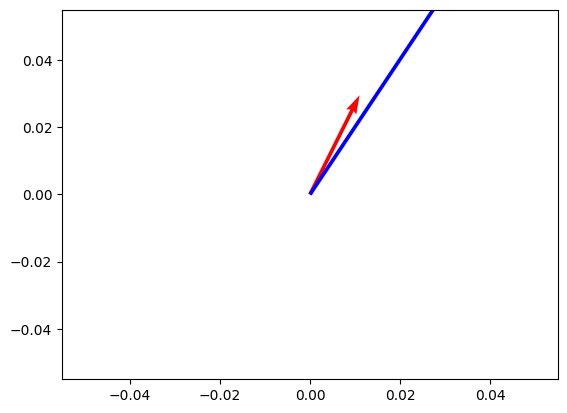

In [70]:
import matplotlib.pyplot as plt
import numpy as np

V = np.array([a.tolist(), b.tolist()])
origin = np.array([[0, 0], [0, 0]])  # origin point

plt.quiver(*origin, V[:, 0], V[:, 1], color=["r", "b", "g"], scale=10)
plt.show()

In [71]:
c = torch.FloatTensor([4, 6, 8])

print(f"Cosine Similarity between a and b: {util.cos_sim(a, b)}")
print(f"Cosine Similarity between a and c: {util.cos_sim(a, c)}")

print(f"Dot product between a and b: {torch.dot(a, b)}")
print(f"Dot product between a and c: {torch.dot(a, c)}")

Cosine Similarity between a and b: tensor([[0.9926]])
Cosine Similarity between a and c: tensor([[0.9926]])
Dot product between a and b: 200.0
Dot product between a and c: 40.0


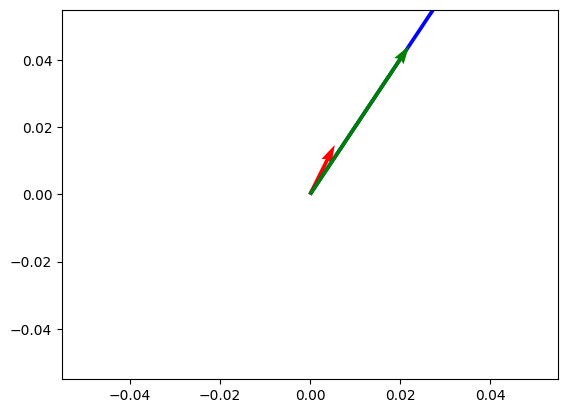

In [72]:
V = np.array([a.tolist(), b.tolist(), c.tolist()])
origin = np.array([[0, 0, 0], [0, 0, 0]])  # origin point

plt.quiver(*origin, V[:, 0], V[:, 1], color=["r", "b", "g"], scale=20)
plt.show()

In [73]:
questions_to_embed = 10
short_corpus_questions = corpus_questions[:questions_to_embed]
short_corpus_questions

['',
 'What do you think education is?',
 'What are the best computer science (CS) / computer systems engineering (CSE) private colleges in India?',
 'If you could go back in time and change one thing about your life, what would it be and why?',
 'How are cats able to get AIDS?',
 'What is the best way to read books effectively?',
 'Has Shahrukh done any kissing scenes?',
 'Is it possible to setup Odoo (OpenERP) on a local Mac system?',
 'Which Party Will Win UP Assembly election in 2017?',
 'How hard is it to get into Purdue?']

In [74]:
model = SentenceTransformer("quora-distilbert-multilingual")
embeddings = model.encode(short_corpus_questions, convert_to_tensor=True)

# Compute distance btween all embeddings
start_time = time.time()
distances = util.pytorch_cos_sim(embeddings, embeddings)
end_time = time.time()

print("Results (after {:.3f} seconds):".format(end_time - start_time))
distances

Results (after 0.109 seconds):


tensor([[1.0000, 0.7129, 0.7045, 0.7585, 0.6306, 0.6998, 0.7163, 0.6885, 0.7530,
         0.6571],
        [0.7129, 1.0000, 0.7920, 0.7492, 0.6765, 0.8048, 0.7197, 0.6887, 0.7098,
         0.7602],
        [0.7045, 0.7920, 1.0000, 0.6601, 0.6831, 0.7520, 0.7681, 0.7881, 0.7388,
         0.7865],
        [0.7585, 0.7492, 0.6601, 1.0000, 0.6666, 0.7538, 0.7512, 0.7004, 0.7644,
         0.6936],
        [0.6306, 0.6765, 0.6831, 0.6666, 1.0000, 0.7085, 0.7740, 0.7899, 0.6822,
         0.7406],
        [0.6998, 0.8048, 0.7520, 0.7538, 0.7085, 1.0000, 0.7592, 0.6935, 0.7025,
         0.7334],
        [0.7163, 0.7197, 0.7681, 0.7512, 0.7740, 0.7592, 1.0000, 0.7695, 0.7475,
         0.7312],
        [0.6885, 0.6887, 0.7881, 0.7004, 0.7899, 0.6935, 0.7695, 1.0000, 0.7337,
         0.8009],
        [0.7530, 0.7098, 0.7388, 0.7644, 0.6822, 0.7025, 0.7475, 0.7337, 1.0000,
         0.7011],
        [0.6571, 0.7602, 0.7865, 0.6936, 0.7406, 0.7334, 0.7312, 0.8009, 0.7011,
         1.0000]], device='m

In [75]:
def compute_embeddings_slow(questions, n=10):
    embeddings = model.encode(
        questions[:n], show_progress_bar=True, convert_to_tensor=True
    )

    # Compute distance btween all embeddings
    start_time = time.time()
    distances = util.pytorch_cos_sim(embeddings, embeddings)
    end_time = time.time()

    return distances, end_time - start_time


_, s = compute_embeddings_slow(corpus_questions, 20000)
print("Results (after {:.3f} seconds):".format(s))

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

Results (after 0.086 seconds):


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

Batches:   0%|          | 0/626 [00:00<?, ?it/s]

Batches:   0%|          | 0/938 [00:00<?, ?it/s]

Text(0, 0.5, 'Time (seconds)')

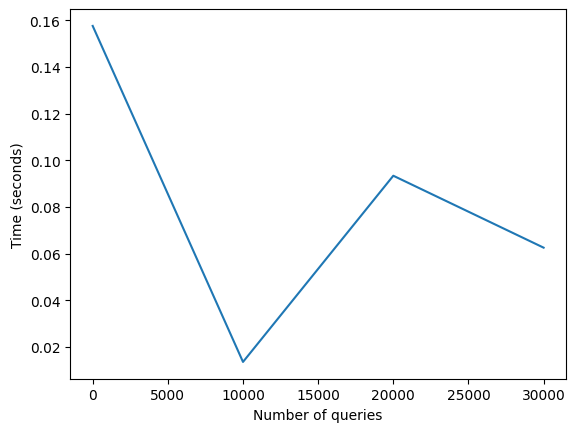

In [76]:
import matplotlib.pyplot as plt

n_queries = [1, 10001, 20001, 30001]  # If I keep going my computer explodes
times = []

for n in n_queries:
    _, s = compute_embeddings_slow(corpus_questions, n)
    times.append(s)
    torch.cuda.empty_cache()  # Clear GPU cache

plt.plot(n_queries, times)
plt.xlabel("Number of queries")
plt.ylabel("Time (seconds)")

In [77]:
start_time = time.time()
paraphrases = util.paraphrase_mining(
    model, corpus_questions[:100000], show_progress_bar=True
)
end_time = time.time()

Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

RuntimeError: MPS backend out of memory (MPS allocated: 8.73 GB, other allocations: 9.51 GB, max allowed: 18.13 GB). Tried to allocate 19.75 KB on private pool. Use PYTORCH_MPS_HIGH_WATERMARK_RATIO=0.0 to disable upper limit for memory allocations (may cause system failure).

In [ ]:
len(paraphrases)

paraphrases[:3]

In [79]:
for score, i, j in paraphrases[:5]:
    print("{:.3f}\t{} and {}".format(score, corpus_questions[i], corpus_questions[j]))

NameError: name 'paraphrases' is not defined

In [82]:
sentences = [
    "The cat sits outside",
    "A man is playing guitar",
    "I love pasta",
    "The new movie is awesome",
    "The cat plays in the garden",
    "A woman watches TV",
    "The new movie is so great",
    "Do you like pizza?",
]

paraphrases = util.paraphrase_mining(model, sentences)

for paraphrase in paraphrases[0:10]:
    score, i, j = paraphrase
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentences[i], sentences[j], score))

The new movie is awesome 		 The new movie is so great 		 Score: 0.9944
The cat sits outside 		 The cat plays in the garden 		 Score: 0.8664
I love pasta 		 Do you like pizza? 		 Score: 0.8134
The new movie is awesome 		 Do you like pizza? 		 Score: 0.7029
I love pasta 		 The new movie is awesome 		 Score: 0.7009
I love pasta 		 The new movie is so great 		 Score: 0.6965
The new movie is so great 		 Do you like pizza? 		 Score: 0.6925
The cat sits outside 		 A woman watches TV 		 Score: 0.6693
I love pasta 		 The cat plays in the garden 		 Score: 0.6671
The cat sits outside 		 I love pasta 		 Score: 0.6536
